<a href="https://colab.research.google.com/github/ShokhjahonNosirov/E-commerce-dataset/blob/master/E_commerce_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# eCommerce website dataset analysis

This file contains behavior data for Nov 2019 from a large electronics commerce online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

#### Event example:
User **user_id** during session **user_session** added to shopping cart (property **event_type** is equal **cart**) product **product_id** of brand **brand** of category **category_code** (**category_code**) with price **price** at **event_time**

## Features

**event_time** - time when event happened at (in UTC)

**event_type** - *view* (user viewed a product), *cart* (a user added a product to shopping cart), *remove_from_cart* (a user removed a product from shopping cart), *purchase* (a user purchased a product)

**product_id** - product id

**category_id** - category id

**category_code** - product's category taxonomy (code name). Usually present for
meaningful categories and skipped for different kinds of accessories

**brand** - downcased string of brand name

**price** - float price of a product

**user_id** - permanent user ID

**user_session** - temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

#Tasks

##Analyze the data for the following problems:
As the owner of the ecommerce web site, we would like to ask you help us to better understand our clients and those who are willing to buy our products. Please, make sure include graphican representation of your conclusion, so that it would be easier for us to visualize. We also want to see numbers.

1. Do users buy a lot from poplular categories and brands by event type?
Popular categories and popular brands are those which has most of the events happened. So do clients buy mostly from those categories/brands or do they mostly buy not so popular products?

2. Consider clients who view a lot of products. Do they eventually buy some, or all, or none of them? Do they view products from the same category, brand or price range? The reason for this question is: can we help them purchase those products or do they simply scroll the feed just unreasonably watching the products?

3. Consider our potential clients. Do they think a lot before buying anything? Or do they purposefully visit the website to to buy specific products?

4. Consider 'cart' event type. Do people view a lot for a product before adding it to the cart?

5. Does timing impact people's view, cart and purchase events? Days or time?

6. Is it easy for people to buy a product in one session?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget 'https://drive.google.com/uc?id=1bnR-Ta492YM2JenJcvM8-kl4cu8xN7WR' -O final.csv
df = pd.read_csv('/content/final.csv')

--2024-11-12 10:38:03--  https://drive.google.com/uc?id=1bnR-Ta492YM2JenJcvM8-kl4cu8xN7WR
Resolving drive.google.com (drive.google.com)... 172.253.62.102, 172.253.62.101, 172.253.62.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bnR-Ta492YM2JenJcvM8-kl4cu8xN7WR [following]
--2024-11-12 10:38:03--  https://drive.usercontent.google.com/download?id=1bnR-Ta492YM2JenJcvM8-kl4cu8xN7WR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66938792 (64M) [application/octet-stream]
Saving to: ‘final.csv’

final.csv           100%[===================>]  63.84M   189MB/s    in 0.3s    

2024-11-12 10:38:07 (189 MB/s) - ‘

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-16 15:16:50 UTC,view,26400393,2053013563651392361,NaN,NaN,50.97,514556965,bbfff9da-51c3-40ca-9fbe-3345be4d923d
1,2019-11-15 08:38:29 UTC,view,6000187,2053013560807654091,auto.accessories.alarm,starline,138.23,560687614,d971fc94-73b4-41b6-b195-a9bca98f365a
2,2019-11-19 06:38:15 UTC,view,11400317,2053013558458843721,NaN,xiaomi,14.41,569313521,3d4db7ed-1bb0-4c7c-a185-9d49697e8610
3,2019-11-15 18:43:14 UTC,view,2701539,2053013563911439225,appliances.kitchen.refrigerators,bosch,1199.26,531154203,505e6891-a907-4703-bcb5-b96f5cf9b5f1
4,2019-11-11 15:54:23 UTC,view,26500477,2053013563550729061,NaN,NaN,402.53,521031927,539d5da1-3410-44b7-b5c7-8f38fe0b32dd


In [ ]:
# 4


value_counts = df['event_type'].value_counts()  # replace 'column_name' with your actual column name
print(value_counts)


event_type
view        472575
cart         22686
purchase      6844
Name: count, dtype: int64


In [ ]:
# count product_id which exist in both view and cart

count_products_with_both = (
    df[df['event_type'].isin(['view', 'cart'])]
    .groupby('product_id')['event_type']
    .nunique()
    .eq(2)
    .sum()
)

print("Number of products with both 'view' and 'cart':", count_products_with_both)

Number of products with both 'view' and 'cart': 6721


In [ ]:
# number of products in cart without view

num_products_cart = df[df['event_type'] == 'cart']['product_id'].nunique()

final_cart_without_view = num_products_cart - count_products_with_both

print("Final cart without view:", final_cart_without_view)

Final cart without view: 659


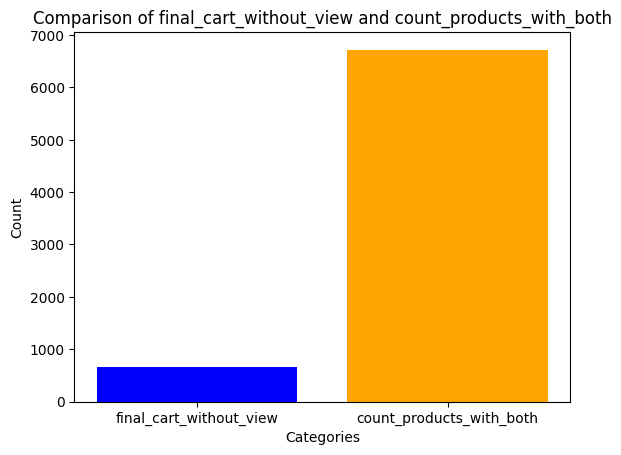

In [ ]:
# Create a list of labels and values
labels = ['final_cart_without_view', 'count_products_with_both']
values = [final_cart_without_view, count_products_with_both]

# Create the bar chart
plt.bar(labels, values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Comparison of final_cart_without_view and count_products_with_both')

# Display the chart
plt.show()

In [ ]:
# how many times product in that column

product_counts = df['product_id'].value_counts()
print(product_counts)

product_id
1005115     4949
1004856     4779
1004767     4283
4804056     2877
1005160     2553
            ... 
39500116       1
20300137       1
28711322       1
26015286       1
28300767       1
Name: count, Length: 69059, dtype: int64


In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-16 15:16:50 UTC,view,26400393,2053013563651392361,NaN,NaN,50.97,514556965,bbfff9da-51c3-40ca-9fbe-3345be4d923d
1,2019-11-15 08:38:29 UTC,view,6000187,2053013560807654091,auto.accessories.alarm,starline,138.23,560687614,d971fc94-73b4-41b6-b195-a9bca98f365a
2,2019-11-19 06:38:15 UTC,view,11400317,2053013558458843721,NaN,xiaomi,14.41,569313521,3d4db7ed-1bb0-4c7c-a185-9d49697e8610
3,2019-11-15 18:43:14 UTC,view,2701539,2053013563911439225,appliances.kitchen.refrigerators,bosch,1199.26,531154203,505e6891-a907-4703-bcb5-b96f5cf9b5f1
4,2019-11-11 15:54:23 UTC,view,26500477,2053013563550729061,NaN,NaN,402.53,521031927,539d5da1-3410-44b7-b5c7-8f38fe0b32dd


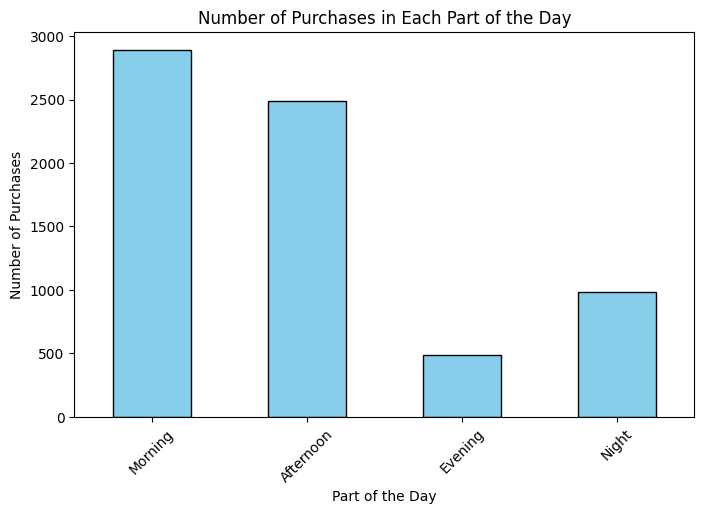

In [ ]:
# 5

# Convert event_time to datetime if it's not already, while ensuring no timezone info
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce', utc=True)

# Remove the timezone information (keep the datetime without UTC)
df['event_time'] = df['event_time'].dt.tz_localize(None)

# Filter for "purchased" event_type
purchased_data = df[df['event_type'] == 'purchase']

# Extract the date from event_time and count occurrences
top_purchase_days = purchased_data['event_time'].dt.date.value_counts().nlargest(10)

# Get the top 2 days with the most "purchased" events
top_2_days = purchased_data['event_time'].dt.date.value_counts().nlargest(2).index

# Exclude these top 2 days
filtered_data = purchased_data[~purchased_data['event_time'].dt.date.isin(top_2_days)]

# Get the top 10 days after excluding the top 2
top_10_excluding_top_2 = filtered_data['event_time'].dt.date.value_counts().nlargest(10)

# Display the top 10 days with the highest purchase counts
# print("Top 10 days with the most 'purchase' events:")
# print(top_10_excluding_top_2)

#df['event_time'] = pd.to_datetime(df['event_time'])
hour = df['event_time'].dt.hour


# Create a function to categorize times into parts of the day
def get_part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to categorize parts of the day, count each part, and plot
purchase_counts_by_part = (
    purchased_data['event_time'].dt.hour.apply(get_part_of_day).value_counts()
)

# Sort the parts of the day in logical order
purchase_counts_by_part = purchase_counts_by_part.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plotting the data
plt.figure(figsize=(8, 5))
purchase_counts_by_part.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title("Number of Purchases in Each Part of the Day")
plt.xlabel("Part of the Day")
plt.ylabel("Number of Purchases")

# Display the plot
plt.xticks(rotation=45)
plt.show()

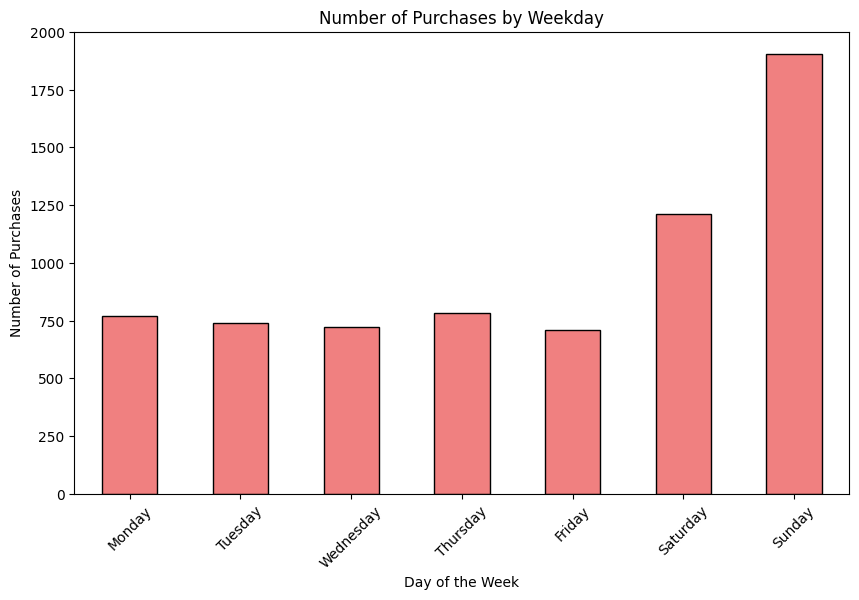

In [ ]:
# Count the number of purchases for each weekday without adding a new column
purchase_counts_by_weekday = purchased_data['event_time'].dt.day_name().value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting the data
plt.figure(figsize=(10, 6))
purchase_counts_by_weekday.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding titles and labels
plt.title("Number of Purchases by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Purchases")

# Display the plot
plt.xticks(rotation=45)
plt.show()

Number of user_sessions with only one purchase: 6826
Number of user_sessions with multiple purchases: 9


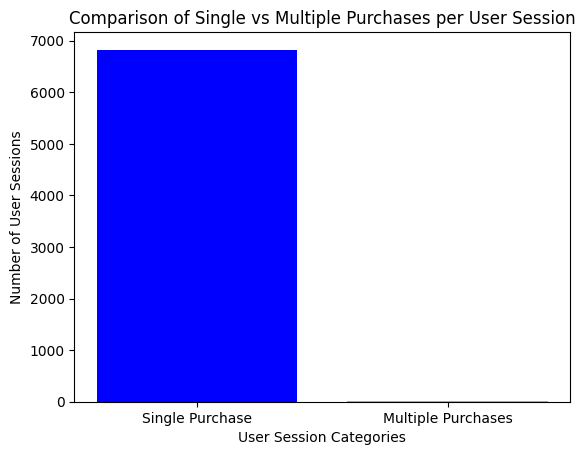

In [ ]:
# 6  Answer is Yes

# Filter for rows where event_type is "purchased"
purchased_data = df[df['event_type'] == 'purchase']

# Count occurrences of each user_session in purchase events
user_session_counts = purchased_data['user_session'].value_counts()

# Separate the counts into two categories
single_purchase_sessions = user_session_counts[user_session_counts == 1].count()
multiple_purchase_sessions = user_session_counts[user_session_counts > 1].count()

# Print results for reference
print("Number of user_sessions with only one purchase:", single_purchase_sessions)
print("Number of user_sessions with multiple purchases:", multiple_purchase_sessions)

# Visualize the comparison
labels = ['Single Purchase', 'Multiple Purchases']
values = [single_purchase_sessions, multiple_purchase_sessions]

plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('User Session Categories')
plt.ylabel('Number of User Sessions')
plt.title('Comparison of Single vs Multiple Purchases per User Session')
plt.show()

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-16 15:16:50,view,26400393,2053013563651392361,NaN,NaN,50.97,514556965,bbfff9da-51c3-40ca-9fbe-3345be4d923d
1,2019-11-15 08:38:29,view,6000187,2053013560807654091,auto.accessories.alarm,starline,138.23,560687614,d971fc94-73b4-41b6-b195-a9bca98f365a
2,2019-11-19 06:38:15,view,11400317,2053013558458843721,NaN,xiaomi,14.41,569313521,3d4db7ed-1bb0-4c7c-a185-9d49697e8610
3,2019-11-15 18:43:14,view,2701539,2053013563911439225,appliances.kitchen.refrigerators,bosch,1199.26,531154203,505e6891-a907-4703-bcb5-b96f5cf9b5f1
4,2019-11-11 15:54:23,view,26500477,2053013563550729061,NaN,NaN,402.53,521031927,539d5da1-3410-44b7-b5c7-8f38fe0b32dd


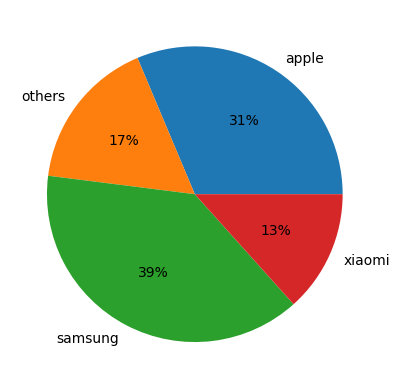

In [ ]:
# 1

top_brands = df['brand'].value_counts().head(10)

brand_events = df[(df['brand'].isin(top_brands.index)) & (df['event_type'] == 'purchase')].groupby(['brand', 'event_type']).size()

brand_events = brand_events.reset_index(name='count')
brand_events['brand'] = brand_events['brand'].apply(lambda x: x if x in ['apple', 'xiaomi', 'samsung'] else 'others')
brand_events = brand_events.groupby(['brand', 'event_type'])['count'].sum()
plt.pie(brand_events, labels=brand_events.index.get_level_values('brand'), autopct='%.0f%%')
plt.show()